In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import stats

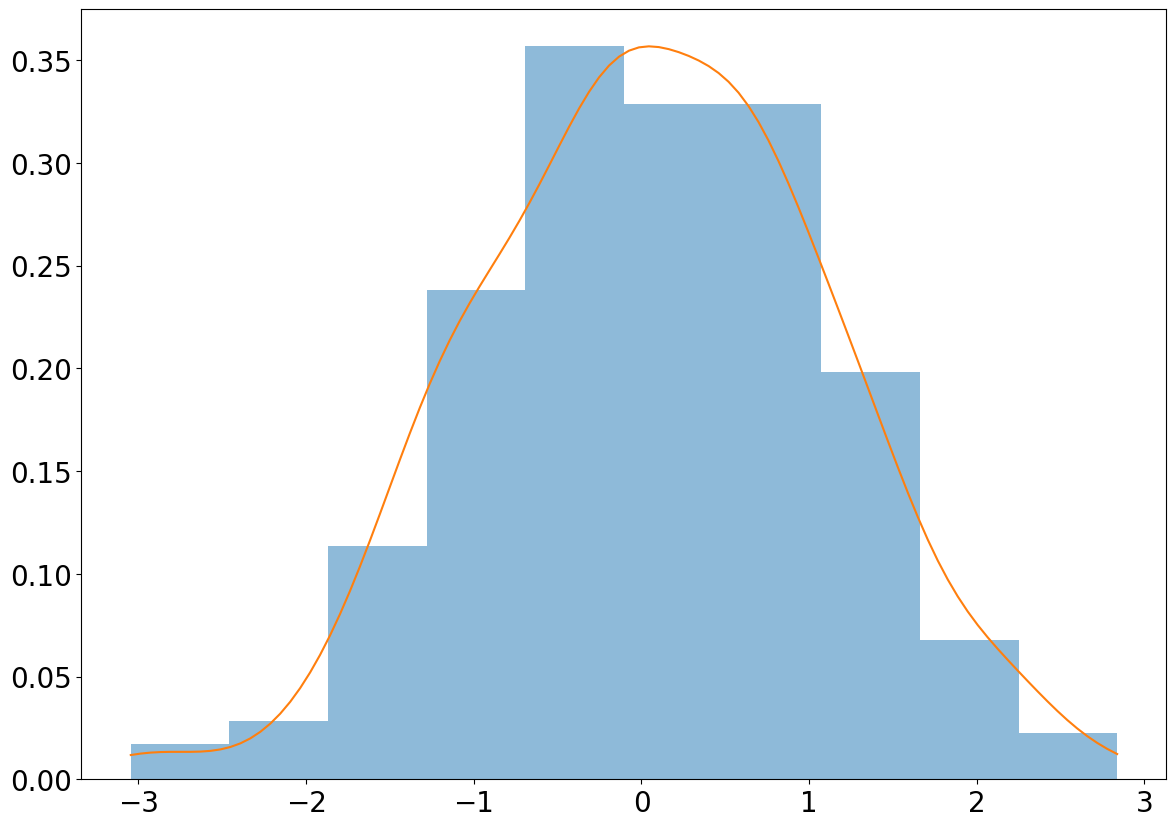

In [4]:
n_data = 300
data = np.random.normal(0, 1, (n_data,))

m_val, M_val = data.min(), data.max()
estimator_x = np.linspace(m_val, M_val, 100)

kde_estimator = stats.gaussian_kde(data)
kde = kde_estimator(estimator_x)

fig, ax = plt.subplots(figsize=(14, 10))
ax.tick_params(labelsize=20)
ax.hist(data,
        alpha=0.5,
        density=True)
ax.plot(estimator_x, kde)

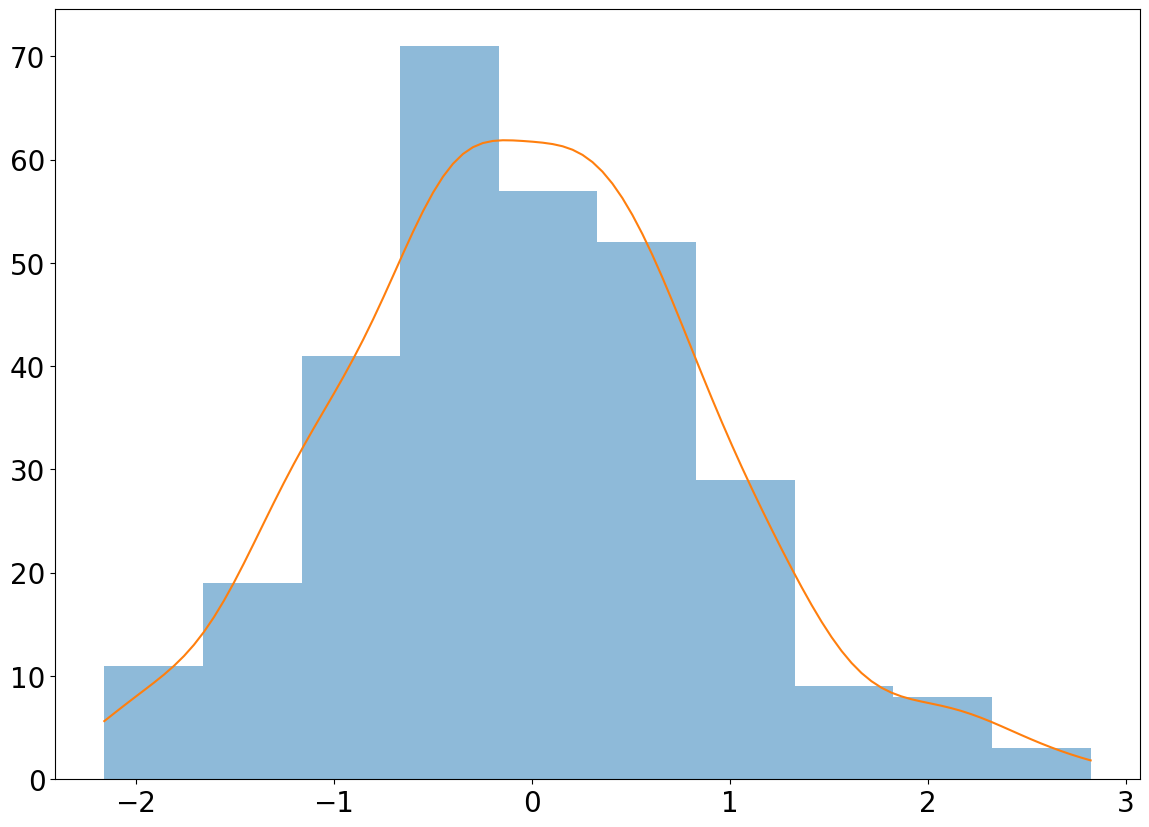

In [6]:
n_data = 300
data = np.random.normal(0, 1, (n_data,))

m_val, M_val = data.min(), data.max()
estimator_x = np.linspace(m_val, M_val, 100)

kde_estimator = stats.gaussian_kde(data)
kde = kde_estimator(estimator_x)

fig, ax = plt.subplots(figsize=(14, 10))
ax.tick_params(labelsize=20)

freqs, bin_edges, rects = ax.hist(data,alpha=0.5)

bin_interval = bin_edges[1] - bin_edges[0]
kde = kde * n_data * bin_interval
ax.plot(estimator_x, kde)

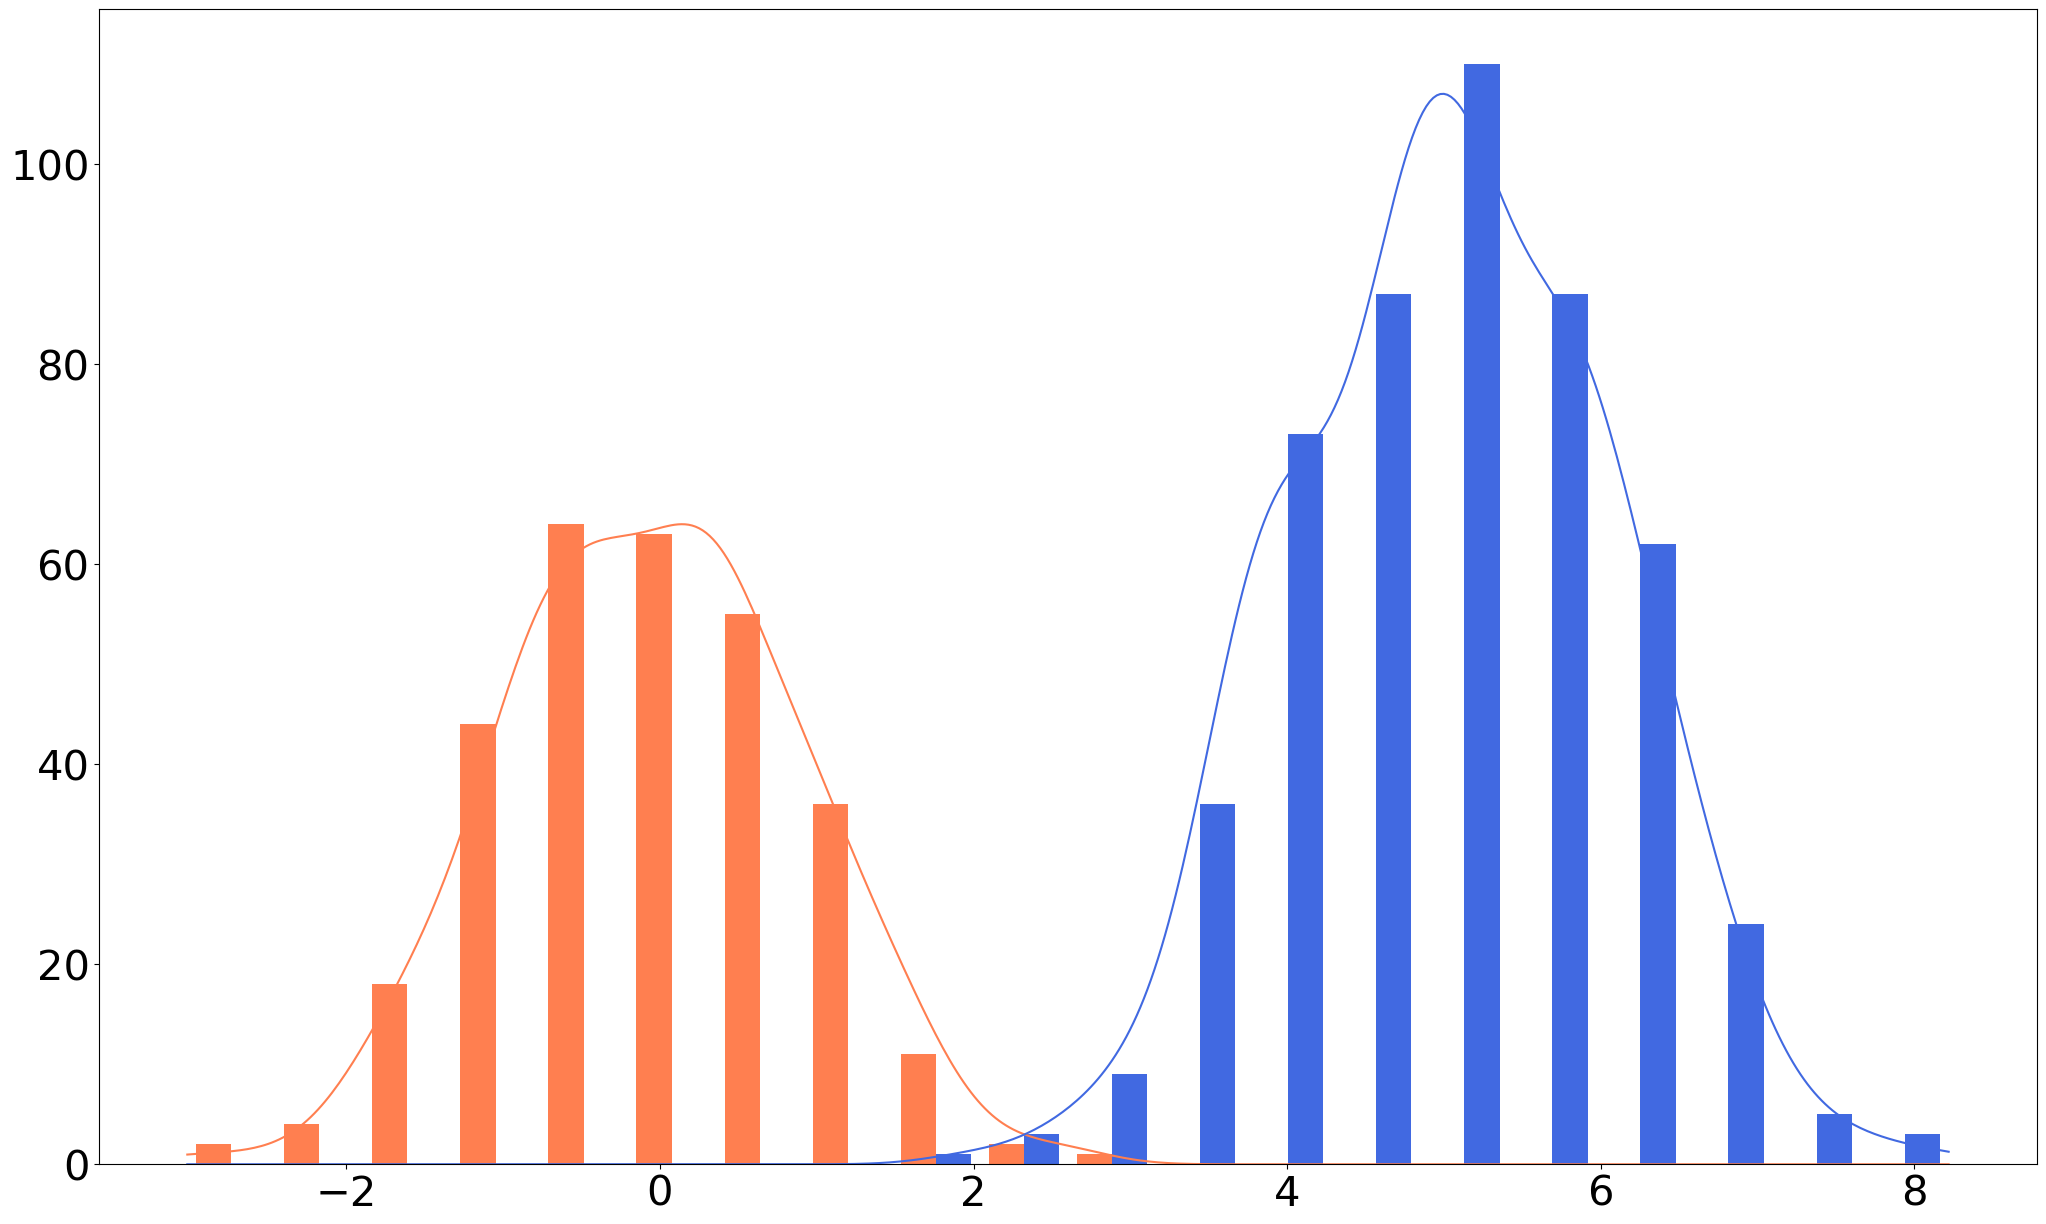

In [8]:
def kde_estimation(data, est_x, n_data, bin_interval):
    estimator = stats.gaussian_kde(data)
    kde = estimator(est_x)
    kde = kde * n_data * bin_interval
    return kde
colors = ['coral', 'royalblue']
n_data_list = [300, 500]
data1 = np.random.normal(0, 1, (n_data_list[0],))
data2 = np.random.normal(5, 1, (n_data_list[1],))
data = np.array([data1, data2], dtype=object)

m_val, M_val = None, None
for class_idx in range(len(data)):
    t_data = data[class_idx]
    
    if m_val == None or t_data.min() < m_val:
        m_val = t_data.min()
    
    if M_val == None or t_data.max() > M_val:
        M_val = t_data.max()

estimator_x = np.linspace(m_val, M_val, 500)

fig, ax = plt.subplots(figsize=(25, 15))
ax.tick_params(labelsize=30)

freqs, bin_edges, rects = ax.hist(data,bins=20,color=colors)

bin_interval = bin_edges[1] - bin_edges[0]


for class_idx in range(2):
    t_data = data[class_idx]
   
    K = kde_estimation(t_data, estimator_x,
                        n_data_list[class_idx],
                        bin_interval)
    ax.plot(estimator_x, K,
            color=colors[class_idx])
   